In [60]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA 
from matplotlib import pyplot

In [101]:
# define training data 
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec']
             , ['this', 'is', 'the', 'second', 'sentence']
             , ['yet', 'another', 'sentence']
             , ['one', 'more', 'sentence']
             , ['and', 'the', 'final', 'sentence']] 

In [102]:
# Minimum count for words is set to 1 so that no words are ignored.
# train model 
model = Word2Vec(sentences, size=100, window=5, min_count=1) 

# summarize the loaded model 
print(model) 

Word2Vec(vocab=14, size=100, alpha=0.025)


In [103]:
# summarize vocabulary 
words = list(model.wv.vocab) 
print(words) 

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [104]:
# access vector for one word from the words
print(model['first']) 

[ 3.2813398e-03  3.1549861e-03  8.4872550e-04 -1.4370995e-03
  4.0519666e-03  1.0417392e-03 -3.8427466e-03  3.1745718e-03
  6.2848051e-04 -4.1112103e-03  3.0209494e-03  4.9321721e-03
 -4.0414403e-03 -3.3522199e-04  7.6319056e-04 -2.2792378e-04
  5.5073673e-04  1.6858550e-03 -4.4963136e-03  2.7490607e-03
  1.2435667e-03 -3.0901996e-05 -3.9199474e-03 -3.8511131e-03
  4.1288591e-04  1.9501979e-03 -2.4401150e-03  4.6302313e-03
  2.6629148e-03 -2.4382281e-03 -3.9127460e-03  4.0213522e-03
  3.7932333e-03  7.1438076e-04  3.0724837e-03  4.5313141e-03
 -8.3693379e-04 -3.9216047e-03  1.5460040e-03 -4.4338000e-03
  3.1042560e-03 -2.0051717e-03 -2.7658679e-03 -3.4186835e-04
 -3.0515448e-03  3.2470874e-03  3.1710286e-03 -4.7780885e-03
 -1.0750667e-03  1.7573192e-03 -2.1130673e-03  1.5129769e-03
 -2.6146674e-03  1.3860641e-03 -3.5374025e-03  2.6099812e-03
  1.7678094e-03 -1.8045612e-03 -5.6900131e-04  6.8246773e-05
 -3.5001091e-03 -2.0800000e-03  3.0676213e-03 -2.1369639e-03
  3.2797966e-03 -2.51522

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [105]:
# save model 
model.save('model.bin') 

In [106]:
# load model 
new_model = Word2Vec.load('model.bin') 

print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [107]:
# fit a 2d PCA model to the vectors 
X = model[model.wv.vocab] 
pca = PCA(n_components=2) 
result = pca.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


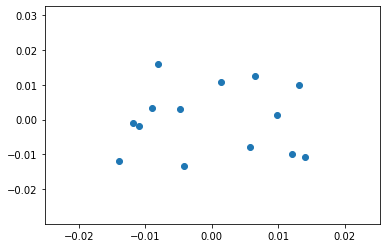

In [108]:
words = list(model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

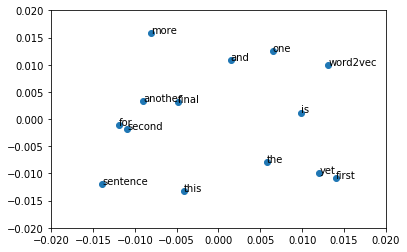

In [109]:
# create a scatter plot of the projection 
pyplot.scatter(result[:, 0], result[:, 1]) 

# adding words to scatter plot
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1])) 
    pyplot.xlim(-.02, .02)
    pyplot.ylim(-.02, .02)
pyplot.show()